키워드 & 주제 테그 살펴보기   
==

### 0. 컬럼 설명
    (1) keyword : 추천을 위해 교보문고에서 각 책에 단 테그
    (2) subject : 책의 주제와 관련된 테그
    
### 1. keyword 컬럼 정리   
    (1) str -> list 로 변환 
    (2) 하나의 테그인데 띄어쓰기 되어 있는 것들 공백 제거 ('현대인'을 '현대', '인'으로 분석하는 걸 방지하기 위해 )  
    (3) 다시 str -> list
    (4) new_keyword 컬럼에 띄어쓰기로 구분된 문장 추가

### 2. subject 컬럼 정리    
    (1) str -> list로 변환
    (2) # 제거
    (3) 다시 str -> list 변환
    (4) new_subject 컬럼에 띄어쓰기로 구분된 문장 추가
    
### 3. keyword 값 살펴보기
    (1) 전체 개수 7663
    (2) 중복 제거 개수 4221
    (3) 빈도수 내림차순으로 그래프 그리기
    
### 4. subject 값 살펴보기
    (1) 전체 개수 2137
    (2) 중복 제거 개수 1351
    (3) 빈도수 내림차순으로 그래프 그리기
    

In [1]:
book_df = pd.read_csv('../data/keyword.csv')
book_df.tail()

,ISBN,keyword,subject
1502,9788931579833,"['물리학', '골반', '한국인', '카툰', '근육', '어깨']",[]
1503,9791157684137,"['부산', '대한민국', '단어장', '공부', '자음', '성조']",[]
1504,9791125460220,"['영어회화', '직장 생활', '연애', '유튜브 채널', '에티켓', '생활영어']","['#영어회화', '#현지영어', '#생활영어']"
1505,9791156175940,"['언어 지식', '유형 공략', '실전 완벽 대비', '일본어 능력 시험', '청...",[]
1506,9788973646814,"['전치사', '조동사', '스펙', '동태', '구문', '의문문']",[]


In [2]:
len(book_df)

1507

### 1. keyword 컬럼 정리

In [3]:
book_df['keyword'][:1].values

array(["['시인', '수필', '오월', '박준', '박완서', '수필집']"], dtype=object)

In [4]:
# 문자열 데이터를 변환
from ast import literal_eval

In [5]:
book_df['keyword']= book_df['keyword'].apply(literal_eval)

In [6]:
book_df['keyword'][:1].values

array([list(['시인', '수필', '오월', '박준', '박완서', '수필집'])], dtype=object)

In [7]:
# 띄어 쓴 단어 붙이기 - 테스트
#book_df.loc[1, 'keyword'] = "['스토리텔링', '광개토대왕', '기출문제', '파이널', '압축', '막판']"

In [8]:
#book_df['keyword'][1:2]

In [9]:
# 띄어 쓴 단어 붙이기 - 적용
for idx, x in enumerate(book_df['keyword']):
    print(idx)
    print(x)
    temp = []
    for y in x:
        print(y, type(y))
        y = y.replace(' ', '')
        temp.append(y)
    print(temp)        
    book_df.loc[idx, 'keyword'] = str(temp)
    temp.clear()

0
['시인', '수필', '오월', '박준', '박완서', '수필집']
시인 <class 'str'>
수필 <class 'str'>
오월 <class 'str'>
박준 <class 'str'>
박완서 <class 'str'>
수필집 <class 'str'>
['시인', '수필', '오월', '박준', '박완서', '수필집']
1
['스토리텔링', '광개토 대왕', '기출 문제', '파이널', '압축', '막판']
스토리텔링 <class 'str'>
광개토 대왕 <class 'str'>
기출 문제 <class 'str'>
파이널 <class 'str'>
압축 <class 'str'>
막판 <class 'str'>
['스토리텔링', '광개토대왕', '기출문제', '파이널', '압축', '막판']
2
['페미니즘', '여성학', '시선', '페미니스트', '문화 정치', '역사학자']
페미니즘 <class 'str'>
여성학 <class 'str'>
시선 <class 'str'>
페미니스트 <class 'str'>
문화 정치 <class 'str'>
역사학자 <class 'str'>
['페미니즘', '여성학', '시선', '페미니스트', '문화정치', '역사학자']
3
['인간본성', '어머니', '작가', '한국 소설', '본성', '유진']
인간본성 <class 'str'>
어머니 <class 'str'>
작가 <class 'str'>
한국 소설 <class 'str'>
본성 <class 'str'>
유진 <class 'str'>
['인간본성', '어머니', '작가', '한국소설', '본성', '유진']
4
['가족', '여성', '청소년소설', '한국소설', '장편소설', '여성서사']
가족 <class 'str'>
여성 <class 'str'>
청소년소설 <class 'str'>
한국소설 <class 'str'>
장편소설 <class 'str'>
여성서사 <class 'str'>
['가족', '여성', '청소년소설', '한국소설', '장편소설', '여성서사

[]
[]
106
['청소년과학', '제우스', '슈뢰딩거', '바이오', '도킨스', '노화']
청소년과학 <class 'str'>
제우스 <class 'str'>
슈뢰딩거 <class 'str'>
바이오 <class 'str'>
도킨스 <class 'str'>
노화 <class 'str'>
['청소년과학', '제우스', '슈뢰딩거', '바이오', '도킨스', '노화']
107
[]
[]
108
['수학', '교재', '물리학', '지식', '동역학', '대칭']
수학 <class 'str'>
교재 <class 'str'>
물리학 <class 'str'>
지식 <class 'str'>
동역학 <class 'str'>
대칭 <class 'str'>
['수학', '교재', '물리학', '지식', '동역학', '대칭']
109
[]
[]
110
['원소', '기체', '주기율표', '반응', '평형', '고체']
원소 <class 'str'>
기체 <class 'str'>
주기율표 <class 'str'>
반응 <class 'str'>
평형 <class 'str'>
고체 <class 'str'>
['원소', '기체', '주기율표', '반응', '평형', '고체']
111
[]
[]
112
['패러데이', '과학이야기', '슈뢰딩거', '파울리', '도플러', '렌츠']
패러데이 <class 'str'>
과학이야기 <class 'str'>
슈뢰딩거 <class 'str'>
파울리 <class 'str'>
도플러 <class 'str'>
렌츠 <class 'str'>
['패러데이', '과학이야기', '슈뢰딩거', '파울리', '도플러', '렌츠']
113
['헌터', '하버드대학', '노벨', '파브르', '프라모델', '파스퇴르']
헌터 <class 'str'>
하버드대학 <class 'str'>
노벨 <class 'str'>
파브르 <class 'str'>
프라모델 <class 'str'>
파스퇴르 <class 'str'>
['헌터', '하버드대학', '노벨', 

작품 <class 'str'>
캐릭터 <class 'str'>
['미스터리작가', '범인', '본격미스터리', '추리', '작품', '캐릭터']
195
['역사', '세계고전문학', '소설가', '연인', '여자', '우연']
역사 <class 'str'>
세계고전문학 <class 'str'>
소설가 <class 'str'>
연인 <class 'str'>
여자 <class 'str'>
우연 <class 'str'>
['역사', '세계고전문학', '소설가', '연인', '여자', '우연']
196
['황제', '로맨스소설', '웹소설', '로맨스', '나비', '판타지']
황제 <class 'str'>
로맨스소설 <class 'str'>
웹소설 <class 'str'>
로맨스 <class 'str'>
나비 <class 'str'>
판타지 <class 'str'>
['황제', '로맨스소설', '웹소설', '로맨스', '나비', '판타지']
197
['정령', '고등 학생', '자각', '은빛', '명계', '종족']
정령 <class 'str'>
고등 학생 <class 'str'>
자각 <class 'str'>
은빛 <class 'str'>
명계 <class 'str'>
종족 <class 'str'>
['정령', '고등학생', '자각', '은빛', '명계', '종족']
198
['문학', '죽음', '청춘', '기억', '사랑', '비틀스']
문학 <class 'str'>
죽음 <class 'str'>
청춘 <class 'str'>
기억 <class 'str'>
사랑 <class 'str'>
비틀스 <class 'str'>
['문학', '죽음', '청춘', '기억', '사랑', '비틀스']
199
['한국현대소설', '한국 소설', '여성서사', '여성', '살인사건', '조각']
한국현대소설 <class 'str'>
한국 소설 <class 'str'>
여성서사 <class 'str'>
여성 <class 'str'>
살인사건 <class 'str'>
조각 <cla

[]
[]
315
['미국소설', '드라마원작소설', '소설', '작품', '호텔', '백작']
미국소설 <class 'str'>
드라마원작소설 <class 'str'>
소설 <class 'str'>
작품 <class 'str'>
호텔 <class 'str'>
백작 <class 'str'>
['미국소설', '드라마원작소설', '소설', '작품', '호텔', '백작']
316
['여성', '청소년소설', '한국소설', '사진', '여성서사', '버들']
여성 <class 'str'>
청소년소설 <class 'str'>
한국소설 <class 'str'>
사진 <class 'str'>
여성서사 <class 'str'>
버들 <class 'str'>
['여성', '청소년소설', '한국소설', '사진', '여성서사', '버들']
317
[]
[]
318
['미스터리소설', '일본소설', '추리소설', '범인', '도둑', '대부']
미스터리소설 <class 'str'>
일본소설 <class 'str'>
추리소설 <class 'str'>
범인 <class 'str'>
도둑 <class 'str'>
대부 <class 'str'>
['미스터리소설', '일본소설', '추리소설', '범인', '도둑', '대부']
319
['계절', '한국소설', '길 고양이', '정치', '페스티벌', '구역']
계절 <class 'str'>
한국소설 <class 'str'>
길 고양이 <class 'str'>
정치 <class 'str'>
페스티벌 <class 'str'>
구역 <class 'str'>
['계절', '한국소설', '길고양이', '정치', '페스티벌', '구역']
320
['계절', '일본라이트노벨', '상처', '일상', '도리', '가짜']
계절 <class 'str'>
일본라이트노벨 <class 'str'>
상처 <class 'str'>
일상 <class 'str'>
도리 <class 'str'>
가짜 <class 'str'>
['계절', '일본라이트노벨', '상처', '

와이파이 <class 'str'>
아이폰 <class 'str'>
왕초보영어 <class 'str'>
['영어회화', '플라워', '경주', '와이파이', '아이폰', '왕초보영어']
402
['전치사', '과거 분사', '현재 분사', '수여 동사', '규칙 동사', '빈도 부사']
전치사 <class 'str'>
과거 분사 <class 'str'>
현재 분사 <class 'str'>
수여 동사 <class 'str'>
규칙 동사 <class 'str'>
빈도 부사 <class 'str'>
['전치사', '과거분사', '현재분사', '수여동사', '규칙동사', '빈도부사']
403
['엄마 아빠', '베이징', '중국어회화', '병음', '회화문', '홀수']
엄마 아빠 <class 'str'>
베이징 <class 'str'>
중국어회화 <class 'str'>
병음 <class 'str'>
회화문 <class 'str'>
홀수 <class 'str'>
['엄마아빠', '베이징', '중국어회화', '병음', '회화문', '홀수']
404
['기초 한자', '어휘', '학습', '한문 교육', '케이스 포함', '정선']
기초 한자 <class 'str'>
어휘 <class 'str'>
학습 <class 'str'>
한문 교육 <class 'str'>
케이스 포함 <class 'str'>
정선 <class 'str'>
['기초한자', '어휘', '학습', '한문교육', '케이스포함', '정선']
405
['시간', '습관', '중급', '동사 원형', '일반 동사', '강 문장']
시간 <class 'str'>
습관 <class 'str'>
중급 <class 'str'>
동사 원형 <class 'str'>
일반 동사 <class 'str'>
강 문장 <class 'str'>
['시간', '습관', '중급', '동사원형', '일반동사', '강문장']
406
['재현', '신비', '사하라 사막', '프린스', '리틀', '불시착']
재현 <class 'str'>

머신 러닝 <class 'str'>
프레임워크 <class 'str'>
신경망 <class 'str'>
스턴스 <class 'str'>
텐서플로 <class 'str'>
['파이썬', '머신러닝', '프레임워크', '신경망', '스턴스', '텐서플로']
523
['삼각함수', '내신', '로그 함수', '지수 함수', '학평', '수열']
삼각함수 <class 'str'>
내신 <class 'str'>
로그 함수 <class 'str'>
지수 함수 <class 'str'>
학평 <class 'str'>
수열 <class 'str'>
['삼각함수', '내신', '로그함수', '지수함수', '학평', '수열']
524
['원소', '미래 에너지', '중화 반응', '지질 시대', '지구 환경', '신소재']
원소 <class 'str'>
미래 에너지 <class 'str'>
중화 반응 <class 'str'>
지질 시대 <class 'str'>
지구 환경 <class 'str'>
신소재 <class 'str'>
['원소', '미래에너지', '중화반응', '지질시대', '지구환경', '신소재']
525
[]
[]
526
['공부 습관', '복습', '오답 노트', '취약점', '학년도 수능 대비', '십계명']
공부 습관 <class 'str'>
복습 <class 'str'>
오답 노트 <class 'str'>
취약점 <class 'str'>
학년도 수능 대비 <class 'str'>
십계명 <class 'str'>
['공부습관', '복습', '오답노트', '취약점', '학년도수능대비', '십계명']
527
['서술형', '단어장', '내신 만점', '마더', '교보문고', '문제 해결 능력']
서술형 <class 'str'>
단어장 <class 'str'>
내신 만점 <class 'str'>
마더 <class 'str'>
교보문고 <class 'str'>
문제 해결 능력 <class 'str'>
['서술형', '단어장', '내신만점', '마더', '교보문고', '

604
['방정식', '인수 분해', '다항식', '부등식', '나머지 정리', '복소수']
방정식 <class 'str'>
인수 분해 <class 'str'>
다항식 <class 'str'>
부등식 <class 'str'>
나머지 정리 <class 'str'>
복소수 <class 'str'>
['방정식', '인수분해', '다항식', '부등식', '나머지정리', '복소수']
605
['문장', '특강', '마스터', '어휘 추론', '학력 평가', '일치']
문장 <class 'str'>
특강 <class 'str'>
마스터 <class 'str'>
어휘 추론 <class 'str'>
학력 평가 <class 'str'>
일치 <class 'str'>
['문장', '특강', '마스터', '어휘추론', '학력평가', '일치']
606
[]
[]
607
['교과서 개념', '정리', '중등 수학', '원주각', '각비', '중학교 수학 학습']
교과서 개념 <class 'str'>
정리 <class 'str'>
중등 수학 <class 'str'>
원주각 <class 'str'>
각비 <class 'str'>
중학교 수학 학습 <class 'str'>
['교과서개념', '정리', '중등수학', '원주각', '각비', '중학교수학학습']
608
['프로그래밍', '컴퓨터', '개발자', '부동소수점', '빌 게이츠', '마이크로프로세서']
프로그래밍 <class 'str'>
컴퓨터 <class 'str'>
개발자 <class 'str'>
부동소수점 <class 'str'>
빌 게이츠 <class 'str'>
마이크로프로세서 <class 'str'>
['프로그래밍', '컴퓨터', '개발자', '부동소수점', '빌게이츠', '마이크로프로세서']
609
['데이터', '보안', '프로그래밍', '프로시저', '요구사항', '애플리케이션']
데이터 <class 'str'>
보안 <class 'str'>
프로그래밍 <class 'str'>
프로시저 <class 'str'>
요구

703
['인간', '그리스도', '구원', '루이스', '성경 구절', '레드']
인간 <class 'str'>
그리스도 <class 'str'>
구원 <class 'str'>
루이스 <class 'str'>
성경 구절 <class 'str'>
레드 <class 'str'>
['인간', '그리스도', '구원', '루이스', '성경구절', '레드']
704
['묵상', '하나님 나라', '성경 말씀', '갈라디아서', '마태복음', '목회']
묵상 <class 'str'>
하나님 나라 <class 'str'>
성경 말씀 <class 'str'>
갈라디아서 <class 'str'>
마태복음 <class 'str'>
목회 <class 'str'>
['묵상', '하나님나라', '성경말씀', '갈라디아서', '마태복음', '목회']
705
['예수', '하나님', '성도', '그리스도', '속죄', '자비']
예수 <class 'str'>
하나님 <class 'str'>
성도 <class 'str'>
그리스도 <class 'str'>
속죄 <class 'str'>
자비 <class 'str'>
['예수', '하나님', '성도', '그리스도', '속죄', '자비']
706
['말씀 묵상', '큐티', '인생', '아브라함', '사라', '하나님 아버지']
말씀 묵상 <class 'str'>
큐티 <class 'str'>
인생 <class 'str'>
아브라함 <class 'str'>
사라 <class 'str'>
하나님 아버지 <class 'str'>
['말씀묵상', '큐티', '인생', '아브라함', '사라', '하나님아버지']
707
['복음', '윤리학', '언약', '유기성', '십자가', '마귀']
복음 <class 'str'>
윤리학 <class 'str'>
언약 <class 'str'>
유기성 <class 'str'>
십자가 <class 'str'>
마귀 <class 'str'>
['복음', '윤리학', '언약', '유기성', '십자가', '마귀']
708

793
['심리상담', '인간관계', '디팩', '백문', '의사소통', '간디']
심리상담 <class 'str'>
인간관계 <class 'str'>
디팩 <class 'str'>
백문 <class 'str'>
의사소통 <class 'str'>
간디 <class 'str'>
['심리상담', '인간관계', '디팩', '백문', '의사소통', '간디']
794
['자본주의', '지상주의', '생명 보험', '시장경제', '미래엔', '도덕철학']
자본주의 <class 'str'>
지상주의 <class 'str'>
생명 보험 <class 'str'>
시장경제 <class 'str'>
미래엔 <class 'str'>
도덕철학 <class 'str'>
['자본주의', '지상주의', '생명보험', '시장경제', '미래엔', '도덕철학']
795
['우울증', '정신건강', '뇌과학', '신경 과학', '항우울제', '인지 행동 치료']
우울증 <class 'str'>
정신건강 <class 'str'>
뇌과학 <class 'str'>
신경 과학 <class 'str'>
항우울제 <class 'str'>
인지 행동 치료 <class 'str'>
['우울증', '정신건강', '뇌과학', '신경과학', '항우울제', '인지행동치료']
796
['사회학', '인문교양서', '한나 아렌트', '자크 데리다', '인정 투쟁', '사유']
사회학 <class 'str'>
인문교양서 <class 'str'>
한나 아렌트 <class 'str'>
자크 데리다 <class 'str'>
인정 투쟁 <class 'str'>
사유 <class 'str'>
['사회학', '인문교양서', '한나아렌트', '자크데리다', '인정투쟁', '사유']
797
['건축', '공간', '건축 이야기', '건축 공간', '멀티플렉스', '현대 건축']
건축 <class 'str'>
공간 <class 'str'>
건축 이야기 <class 'str'>
건축 공간 <class 'str'>
멀티플렉스 <class '

884
['유튜브', '무기력', '한국에세이', '우울', '일상', '마음']
유튜브 <class 'str'>
무기력 <class 'str'>
한국에세이 <class 'str'>
우울 <class 'str'>
일상 <class 'str'>
마음 <class 'str'>
['유튜브', '무기력', '한국에세이', '우울', '일상', '마음']
885
['권여선', '문학평론', '배수아', '임철우', '은희경', '박형준']
권여선 <class 'str'>
문학평론 <class 'str'>
배수아 <class 'str'>
임철우 <class 'str'>
은희경 <class 'str'>
박형준 <class 'str'>
['권여선', '문학평론', '배수아', '임철우', '은희경', '박형준']
886
['부조리', '정신 의학', '류시화', '호스피스', '데이비드', '마지막 순간']
부조리 <class 'str'>
정신 의학 <class 'str'>
류시화 <class 'str'>
호스피스 <class 'str'>
데이비드 <class 'str'>
마지막 순간 <class 'str'>
['부조리', '정신의학', '류시화', '호스피스', '데이비드', '마지막순간']
887
['자전적에세이', '예비 교사', '법정 스님', '자연환경', '호숫가', '생태주의']
자전적에세이 <class 'str'>
예비 교사 <class 'str'>
법정 스님 <class 'str'>
자연환경 <class 'str'>
호숫가 <class 'str'>
생태주의 <class 'str'>
['자전적에세이', '예비교사', '법정스님', '자연환경', '호숫가', '생태주의']
888
['타인', '하루', '임상 심리사', '시전', '클래식 음악', '심리 평가']
타인 <class 'str'>
하루 <class 'str'>
임상 심리사 <class 'str'>
시전 <class 'str'>
클래식 음악 <class 'str'>
심리 평가 <class 'str'>

989
['명상', '마음 치유', '위장관', '콜레스테롤 수치', '투스', '세도']
명상 <class 'str'>
마음 치유 <class 'str'>
위장관 <class 'str'>
콜레스테롤 수치 <class 'str'>
투스 <class 'str'>
세도 <class 'str'>
['명상', '마음치유', '위장관', '콜레스테롤수치', '투스', '세도']
990
[]
[]
991
[]
[]
992
[]
[]
993
[]
[]
994
[]
[]
995
['치매 예방', '두뇌 게임', '중급', '네모', '메모', '연필']
치매 예방 <class 'str'>
두뇌 게임 <class 'str'>
중급 <class 'str'>
네모 <class 'str'>
메모 <class 'str'>
연필 <class 'str'>
['치매예방', '두뇌게임', '중급', '네모', '메모', '연필']
996
[]
[]
997
[]
[]
998
[]
[]
999
['명상', '운동학', '동역학', '위력', '임계점', '진실']
명상 <class 'str'>
운동학 <class 'str'>
동역학 <class 'str'>
위력 <class 'str'>
임계점 <class 'str'>
진실 <class 'str'>
['명상', '운동학', '동역학', '위력', '임계점', '진실']
1000
[]
[]
1001
['골반', '모델링', '치료법', '질환', '정형외과', '운동습관']
골반 <class 'str'>
모델링 <class 'str'>
치료법 <class 'str'>
질환 <class 'str'>
정형외과 <class 'str'>
운동습관 <class 'str'>
['골반', '모델링', '치료법', '질환', '정형외과', '운동습관']
1002
['스트레칭', '피지컬', '근막', '레이즈', '셀프', '프레스']
스트레칭 <class 'str'>
피지컬 <class 'str'>
근막 <class 'str'>
레이즈 <class 'str'

크리스마스 <class 'str'>
모나 <class 'str'>
루시아 <class 'str'>
페페 <class 'str'>
['가드너', '식물기르기', '크리스마스', '모나', '루시아', '페페']
1087
[]
[]
1088
['스마트폰', '치매 예방', '유럽', '어휘력', '직장인', '어버이날']
스마트폰 <class 'str'>
치매 예방 <class 'str'>
유럽 <class 'str'>
어휘력 <class 'str'>
직장인 <class 'str'>
어버이날 <class 'str'>
['스마트폰', '치매예방', '유럽', '어휘력', '직장인', '어버이날']
1089
['라이프스타일', '보그', '린지', '그레타', '와그너', '알렉상드르']
라이프스타일 <class 'str'>
보그 <class 'str'>
린지 <class 'str'>
그레타 <class 'str'>
와그너 <class 'str'>
알렉상드르 <class 'str'>
['라이프스타일', '보그', '린지', '그레타', '와그너', '알렉상드르']
1090
['대한민국', '채소', '뿌리', '뿌리채소', '해충', '열매']
대한민국 <class 'str'>
채소 <class 'str'>
뿌리 <class 'str'>
뿌리채소 <class 'str'>
해충 <class 'str'>
열매 <class 'str'>
['대한민국', '채소', '뿌리', '뿌리채소', '해충', '열매']
1091
['옷만들기', '바느질', '원피스', '재봉', '원단', '소매']
옷만들기 <class 'str'>
바느질 <class 'str'>
원피스 <class 'str'>
재봉 <class 'str'>
원단 <class 'str'>
소매 <class 'str'>
['옷만들기', '바느질', '원피스', '재봉', '원단', '소매']
1092
['종이접기', '의상', '인형 놀이', '전작', '지갑', '코디']
종이접기 <class 'str'>
의상 <c

복지 <class 'str'>
대학 강의 <class 'str'>
개론 <class 'str'>
테러리즘 <class 'str'>
['자본주의', '환경문제', '복지', '대학강의', '개론', '테러리즘']
1183
['밀레 니얼 세대', '청춘', '기성 세대', '작가', '목소리', '한국 사회']
밀레 니얼 세대 <class 'str'>
청춘 <class 'str'>
기성 세대 <class 'str'>
작가 <class 'str'>
목소리 <class 'str'>
한국 사회 <class 'str'>
['밀레니얼세대', '청춘', '기성세대', '작가', '목소리', '한국사회']
1184
['스피치', '아이디어', '독서', '창의성', '로드맵', '생각정리']
스피치 <class 'str'>
아이디어 <class 'str'>
독서 <class 'str'>
창의성 <class 'str'>
로드맵 <class 'str'>
생각정리 <class 'str'>
['스피치', '아이디어', '독서', '창의성', '로드맵', '생각정리']
1185
['인권', '동물', '노동자', '식용', '멸종 위기', '돼지']
인권 <class 'str'>
동물 <class 'str'>
노동자 <class 'str'>
식용 <class 'str'>
멸종 위기 <class 'str'>
돼지 <class 'str'>
['인권', '동물', '노동자', '식용', '멸종위기', '돼지']
1186
['파이썬', '알고리즘', '커리어', '프로그래밍 언어', '딥 러닝', '코딩']
파이썬 <class 'str'>
알고리즘 <class 'str'>
커리어 <class 'str'>
프로그래밍 언어 <class 'str'>
딥 러닝 <class 'str'>
코딩 <class 'str'>
['파이썬', '알고리즘', '커리어', '프로그래밍언어', '딥러닝', '코딩']
1187
['자기관리', '아마존', '자기혁신', '말콤', '서번트', '재능']
자기관리 <cla

우울증 <class 'str'>
베스트셀러 <class 'str'>
연애편지 <class 'str'>
알렉스 <class 'str'>
['본성', '외로움', '우울증', '베스트셀러', '연애편지', '알렉스']
1283
[]
[]
1284
['습관', '뇌과학', '스마트폰', '설계', '보상', '페이스북']
습관 <class 'str'>
뇌과학 <class 'str'>
스마트폰 <class 'str'>
설계 <class 'str'>
보상 <class 'str'>
페이스북 <class 'str'>
['습관', '뇌과학', '스마트폰', '설계', '보상', '페이스북']
1285
['커리어', '자기관리', '인생', '자기혁신', '하이데거', '밀리언셀러']
커리어 <class 'str'>
자기관리 <class 'str'>
인생 <class 'str'>
자기혁신 <class 'str'>
하이데거 <class 'str'>
밀리언셀러 <class 'str'>
['커리어', '자기관리', '인생', '자기혁신', '하이데거', '밀리언셀러']
1286
['인간관계', '행복', '경제학', '교양심리', '인간 심리', '투자']
인간관계 <class 'str'>
행복 <class 'str'>
경제학 <class 'str'>
교양심리 <class 'str'>
인간 심리 <class 'str'>
투자 <class 'str'>
['인간관계', '행복', '경제학', '교양심리', '인간심리', '투자']
1287
['유튜브', '일상', '멘토', '꿈', '영상', '관계']
유튜브 <class 'str'>
일상 <class 'str'>
멘토 <class 'str'>
꿈 <class 'str'>
영상 <class 'str'>
관계 <class 'str'>
['유튜브', '일상', '멘토', '꿈', '영상', '관계']
1288
['아마존', '삶', '습관', '인생', '법칙', '벤저민 프랭클린']
아마존 <class 'str'>
삶 <class 's

아메리카 <class 'str'>
오스트레일리아 <class 'str'>
['남극', '아프리카', '북아메리카', '콜럼버스', '아메리카', '오스트레일리아']
1367
[]
[]
1368
['교과서', '교양세계사', '유럽', '중국', '소련', '중동']
교과서 <class 'str'>
교양세계사 <class 'str'>
유럽 <class 'str'>
중국 <class 'str'>
소련 <class 'str'>
중동 <class 'str'>
['교과서', '교양세계사', '유럽', '중국', '소련', '중동']
1369
['세계지리', '미국', '유럽', '에베레스트', '태평양', '러시아']
세계지리 <class 'str'>
미국 <class 'str'>
유럽 <class 'str'>
에베레스트 <class 'str'>
태평양 <class 'str'>
러시아 <class 'str'>
['세계지리', '미국', '유럽', '에베레스트', '태평양', '러시아']
1370
['조선', '왕후', '이성계', '광해군', '연산군', '숙종']
조선 <class 'str'>
왕후 <class 'str'>
이성계 <class 'str'>
광해군 <class 'str'>
연산군 <class 'str'>
숙종 <class 'str'>
['조선', '왕후', '이성계', '광해군', '연산군', '숙종']
1371
['삼국지', '제갈량', '중국', '사마의', '삼국시대', '중국역사인물']
삼국지 <class 'str'>
제갈량 <class 'str'>
중국 <class 'str'>
사마의 <class 'str'>
삼국시대 <class 'str'>
중국역사인물 <class 'str'>
['삼국지', '제갈량', '중국', '사마의', '삼국시대', '중국역사인물']
1372
['삼국지', '번역', '민음사', '세계기록유산', '연보', '충무공']
삼국지 <class 'str'>
번역 <class 'str'>
민음사 <class 'str'>
세계

1464
['체르니', '피아노악보', '편곡', '노래', '악보집', '영상']
체르니 <class 'str'>
피아노악보 <class 'str'>
편곡 <class 'str'>
노래 <class 'str'>
악보집 <class 'str'>
영상 <class 'str'>
['체르니', '피아노악보', '편곡', '노래', '악보집', '영상']
1465
['포토샵', '브러시', '아티스트', '채색', '야수', '제러미']
포토샵 <class 'str'>
브러시 <class 'str'>
아티스트 <class 'str'>
채색 <class 'str'>
야수 <class 'str'>
제러미 <class 'str'>
['포토샵', '브러시', '아티스트', '채색', '야수', '제러미']
1466
['어린이', '교재']
어린이 <class 'str'>
교재 <class 'str'>
['어린이', '교재']
1467
['캘리그라피', '서예', '글자', '손오공', '자음', '이태백']
캘리그라피 <class 'str'>
서예 <class 'str'>
글자 <class 'str'>
손오공 <class 'str'>
자음 <class 'str'>
이태백 <class 'str'>
['캘리그라피', '서예', '글자', '손오공', '자음', '이태백']
1468
['미술사', '인생', '미술', '치유', '포켓북', '예술 작품']
미술사 <class 'str'>
인생 <class 'str'>
미술 <class 'str'>
치유 <class 'str'>
포켓북 <class 'str'>
예술 작품 <class 'str'>
['미술사', '인생', '미술', '치유', '포켓북', '예술작품']
1469
['론도', '멘델스존', '차이코프스키', '안단테', '슈베르트', '전람회']
론도 <class 'str'>
멘델스존 <class 'str'>
차이코프스키 <class 'str'>
안단테 <class 'str'>
슈베르트 <class 'str'>
전람회

In [10]:
book_df.head()

,ISBN,keyword,subject
0,9788937437496,"['시인', '수필', '오월', '박준', '박완서', '수필집']",[]
1,9791129706126,"['스토리텔링', '광개토대왕', '기출문제', '파이널', '압축', '막판']",[]
2,9788901240114,"['페미니즘', '여성학', '시선', '페미니스트', '문화정치', '역사학자']",[]
3,9788956609959,"['인간본성', '어머니', '작가', '한국소설', '본성', '유진']","['#살인자', '#인간본성', '#악인']"
4,9788936477936,"['가족', '여성', '청소년소설', '한국소설', '장편소설', '여성서사']","['#한국소설', '#청소년소설', '#여성서사', '#일제강점기', '#근현대사'..."


In [11]:
# 다시 문자열을 변환
book_df['keyword']= book_df['keyword'].apply(literal_eval)

In [12]:
# 띄어쓰기로 구분된 문장만들기
book_df['new_keyword'] = book_df['keyword'].apply(lambda x : (' ').join(x))
book_df.head()

,ISBN,keyword,subject,new_keyword
0,9788937437496,"[시인, 수필, 오월, 박준, 박완서, 수필집]",[],시인 수필 오월 박준 박완서 수필집
1,9791129706126,"[스토리텔링, 광개토대왕, 기출문제, 파이널, 압축, 막판]",[],스토리텔링 광개토대왕 기출문제 파이널 압축 막판
2,9788901240114,"[페미니즘, 여성학, 시선, 페미니스트, 문화정치, 역사학자]",[],페미니즘 여성학 시선 페미니스트 문화정치 역사학자
3,9788956609959,"[인간본성, 어머니, 작가, 한국소설, 본성, 유진]","['#살인자', '#인간본성', '#악인']",인간본성 어머니 작가 한국소설 본성 유진
4,9788936477936,"[가족, 여성, 청소년소설, 한국소설, 장편소설, 여성서사]","['#한국소설', '#청소년소설', '#여성서사', '#일제강점기', '#근현대사'...",가족 여성 청소년소설 한국소설 장편소설 여성서사


### 2. subject 컬럼 정리

In [13]:
book_df['subject'][:1].values

array(['[]'], dtype=object)

In [14]:
# 문자열을 변환
book_df['subject'] = book_df['subject'].apply(literal_eval)

In [15]:
book_df['subject'][:1].values

array([list([])], dtype=object)

In [16]:
# 태그 제거
book_df['subject'] = book_df['subject'].apply(lambda x: str(x).replace('#', ''))

In [17]:
book_df.head()

,ISBN,keyword,subject,new_keyword
0,9788937437496,"[시인, 수필, 오월, 박준, 박완서, 수필집]",[],시인 수필 오월 박준 박완서 수필집
1,9791129706126,"[스토리텔링, 광개토대왕, 기출문제, 파이널, 압축, 막판]",[],스토리텔링 광개토대왕 기출문제 파이널 압축 막판
2,9788901240114,"[페미니즘, 여성학, 시선, 페미니스트, 문화정치, 역사학자]",[],페미니즘 여성학 시선 페미니스트 문화정치 역사학자
3,9788956609959,"[인간본성, 어머니, 작가, 한국소설, 본성, 유진]","['살인자', '인간본성', '악인']",인간본성 어머니 작가 한국소설 본성 유진
4,9788936477936,"[가족, 여성, 청소년소설, 한국소설, 장편소설, 여성서사]","['한국소설', '청소년소설', '여성서사', '일제강점기', '근현대사', '가족...",가족 여성 청소년소설 한국소설 장편소설 여성서사


In [18]:
# 다시 문자열을 변환
book_df['subject'] = book_df['subject'].apply(literal_eval)

In [19]:
# 띄어쓰기로 구분된 문장만들기
book_df['new_subject'] = book_df['subject'].apply(lambda x: (' ').join(x))
book_df.head()

,ISBN,keyword,subject,new_keyword,new_subject
0,9788937437496,"[시인, 수필, 오월, 박준, 박완서, 수필집]",[],시인 수필 오월 박준 박완서 수필집,
1,9791129706126,"[스토리텔링, 광개토대왕, 기출문제, 파이널, 압축, 막판]",[],스토리텔링 광개토대왕 기출문제 파이널 압축 막판,
2,9788901240114,"[페미니즘, 여성학, 시선, 페미니스트, 문화정치, 역사학자]",[],페미니즘 여성학 시선 페미니스트 문화정치 역사학자,
3,9788956609959,"[인간본성, 어머니, 작가, 한국소설, 본성, 유진]","[살인자, 인간본성, 악인]",인간본성 어머니 작가 한국소설 본성 유진,살인자 인간본성 악인
4,9788936477936,"[가족, 여성, 청소년소설, 한국소설, 장편소설, 여성서사]","[한국소설, 청소년소설, 여성서사, 일제강점기, 근현대사, 가족, 여성, 엄마]",가족 여성 청소년소설 한국소설 장편소설 여성서사,한국소설 청소년소설 여성서사 일제강점기 근현대사 가족 여성 엄마


In [20]:
book_df.to_csv('../data/bookkeyword.csv', mode='w')

### 3. keyword 값 살펴보기

In [30]:
keyword_temp = sum(book_df['keyword'], [])

In [31]:
keyword_temp

['시인',
 '수필',
 '오월',
 '박준',
 '박완서',
 '수필집',
 '스토리텔링',
 '광개토대왕',
 '기출문제',
 '파이널',
 '압축',
 '막판',
 '페미니즘',
 '여성학',
 '시선',
 '페미니스트',
 '문화정치',
 '역사학자',
 '인간본성',
 '어머니',
 '작가',
 '한국소설',
 '본성',
 '유진',
 '가족',
 '여성',
 '청소년소설',
 '한국소설',
 '장편소설',
 '여성서사',
 '성장소설',
 '데미안',
 '사문',
 '바라문',
 '뱃사공',
 '타마',
 '미국소설',
 '노벨문학상',
 '퓰리처상',
 '실존철학',
 '마지막소설',
 '미국현대문학',
 '연애',
 '일상',
 '심리학',
 '한국에세이',
 '위로',
 '마음챙김',
 '차라투스트라',
 '철학에세이',
 '우파니샤드',
 '계단',
 '인문과학',
 '불편',
 '여행에세이',
 '바르셀로나',
 '빈티지',
 '포틀랜드',
 '뉴질랜드',
 '베를린',
 '추천코스',
 '여행코스',
 '자전거여행',
 '순환',
 '삼양',
 '동해',
 '여행가이드북',
 '유럽여행',
 '체코',
 '베스트',
 '프라하',
 '크로아티아',
 '여행가이드북',
 '타이베이',
 '타이',
 '대만여행',
 '동부',
 '숙소예약',
 '웹툰',
 '케냐',
 '에티오피아',
 '갱스터',
 '마다가스카르',
 '우간다',
 '책읽기',
 '만화책',
 '스리랑카',
 '영어교육',
 '언어교육',
 '교육방법',
 '시나리오',
 '감독',
 '야구',
 '히어로즈',
 '이글스',
 '이슈',
 '심리치료',
 '응급처치',
 '생존',
 '락스',
 '아쿠아',
 '서바이벌',
 '스티커북',
 '그레이',
 '하운드',
 '아이슬란드',
 '치와와',
 '진돗개',
 '행복',
 '자기관리',
 '자기혁신',
 '대인관계',
 '긍정',
 '우울',
 '유튜브',
 '시간관리',
 '전술',
 '스마트폰',
 '하이라이트',

In [32]:
# 전체 키워드 개수
len(keyword_temp)

7663

In [33]:
# 중복제거한 키워드 개수
keyword_temp2 = set(keyword_temp)
len(keyword_temp2)

4221

In [34]:
# 단어 빈도 세기
import nltk

keyword_temp3 = nltk.Text(keyword_temp, name='키워드')

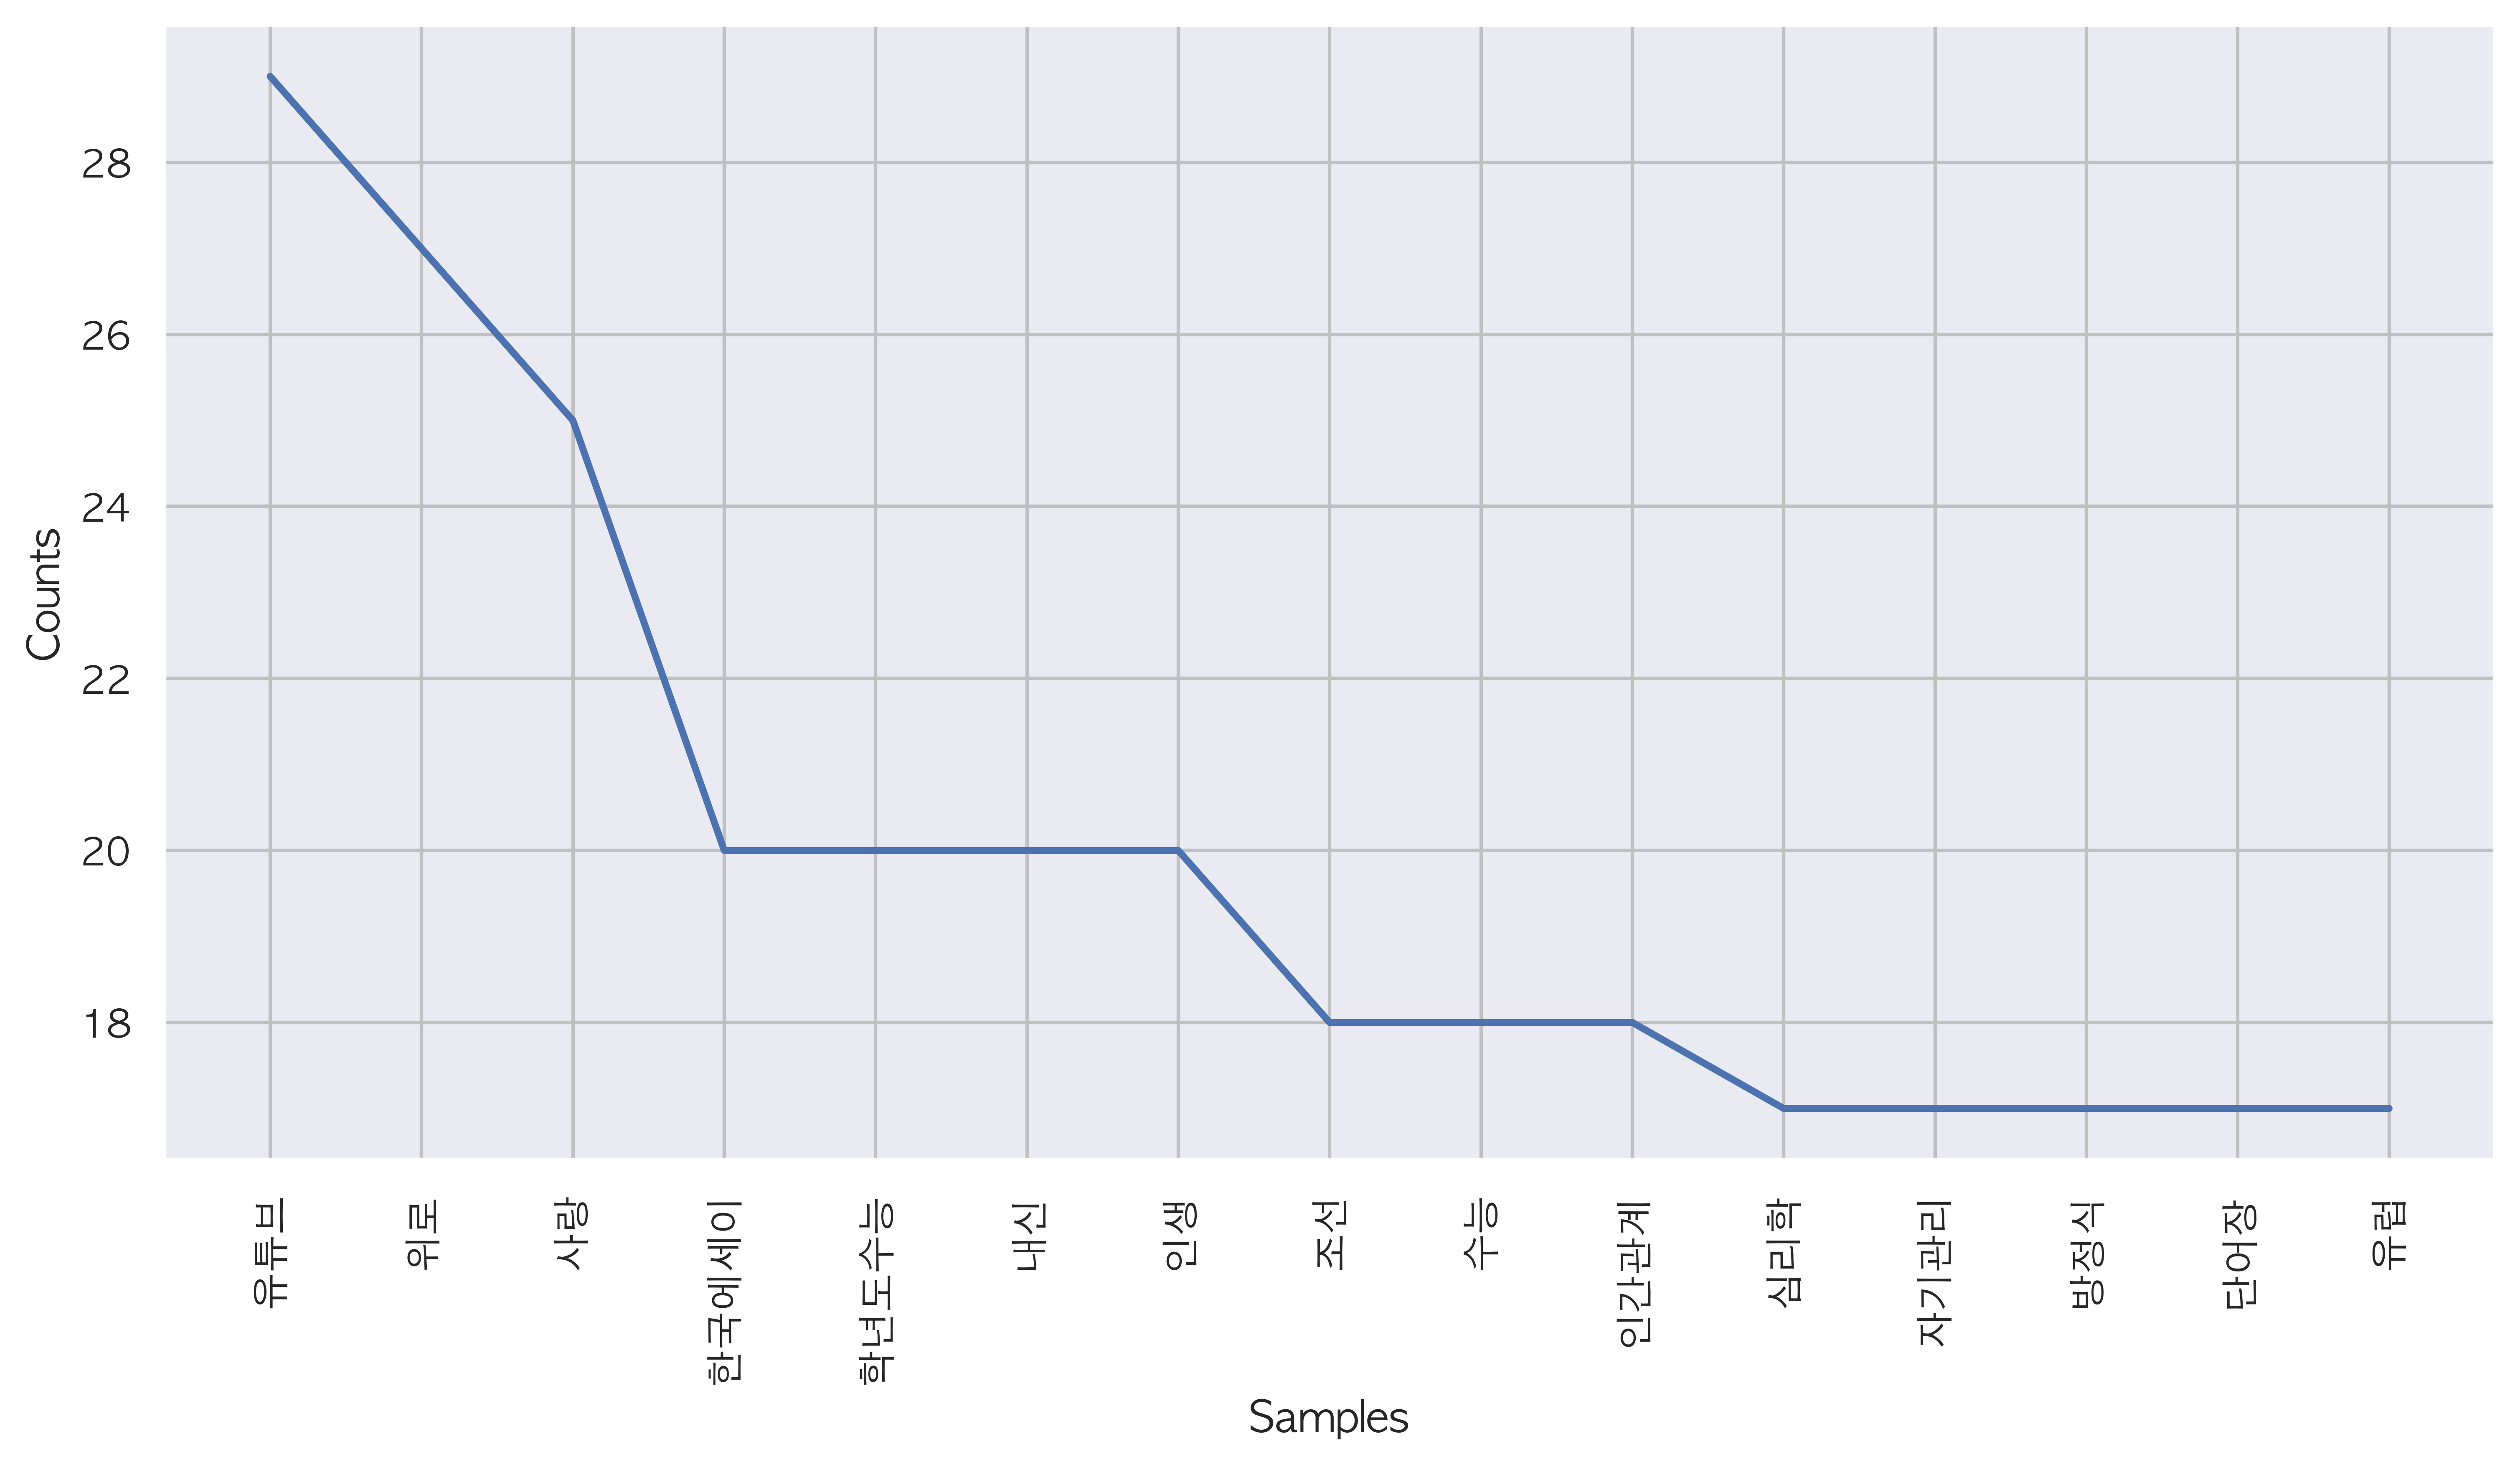

In [73]:
# 단어 빈도 그래프로 그리기

# 한글 폰트 설정
import  matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

#f_path = "c:/Windows/Fonts/Nanumgothic.ttf"
#font_name = font_manager.FontProperties(fname=f_path).get_name()
#rc('font', family=font_name)

plt.figure(figsize=(12, 6))
keyword_temp3.plot(15)
plt.show()

### 4. subject 값 살펴 보기

In [39]:
subject_temp = sum(book_df['subject'], [])

In [40]:
subject_temp

['살인자',
 '인간본성',
 '악인',
 '한국소설',
 '청소년소설',
 '여성서사',
 '일제강점기',
 '근현대사',
 '가족',
 '여성',
 '엄마',
 '성장소설',
 '퓰리처상',
 '미국현대문학',
 '미국소설',
 '노벨문학상',
 '한국에세이',
 '명상',
 '혼자',
 '소확행',
 '연애',
 '일상',
 '마음챙김',
 '심리학',
 '철학에세이',
 '인문과학',
 '시간관리',
 '애견기르기',
 '반려동물',
 '반려견',
 '기독교결혼',
 '정치가',
 '교양과학',
 '우주',
 '은하계',
 '태양',
 '천문학',
 '과학자',
 '교양과학',
 '과학이야기',
 '전염병',
 '감염',
 '과학이야기',
 '물리학',
 '빅뱅이론',
 '양자역학',
 '대유행',
 '전염병',
 '병원균',
 '판데믹',
 '칼세이건',
 '다큐멘터리',
 '우주',
 '생명',
 '자연',
 '기원',
 '법칙',
 '탐구',
 '교양수학',
 '수학개념',
 '과학이야기',
 '뇌기능장애',
 '신경장애',
 '뇌의학',
 '뇌과학',
 '현대의학',
 '임상기록',
 '과학이야기',
 '유전학',
 '현대생물학',
 '경제자격증',
 '무역영어',
 '모듈형',
 'NCS',
 '직업기초능력평가',
 '공기업',
 '공사공단',
 '위포트',
 'NCS',
 '모의고사',
 '과학이야기',
 '현대수학',
 '수학강의',
 '상대성이론',
 '페르마',
 '우주',
 '일반상대성이론',
 '양자이론',
 '현대물리학',
 '뇌졸증',
 '뇌과학',
 '신경과학',
 '뇌의가소성',
 '물리학',
 '물리법칙',
 '양자세계',
 '현실세계',
 '흐름',
 '비유',
 '과학웹툰',
 '공룡생태',
 '과학이야기',
 '생물계',
 '도시화',
 '청소년과학',
 '뇌과학',
 '기초과학',
 '천문학',
 '미세먼지',
 '기후학',
 '오염먼지',
 '지구온난화',
 '대기오염',
 '대기과학자',
 '양자역학',
 '진화

In [41]:
# 주제 키워드 전체 개수
len(subject_temp)

2137

In [42]:
# 주제 키워드 중복 제거 한 후 개수
subject_temp2 = set(subject_temp)
len(subject_temp2)

1351

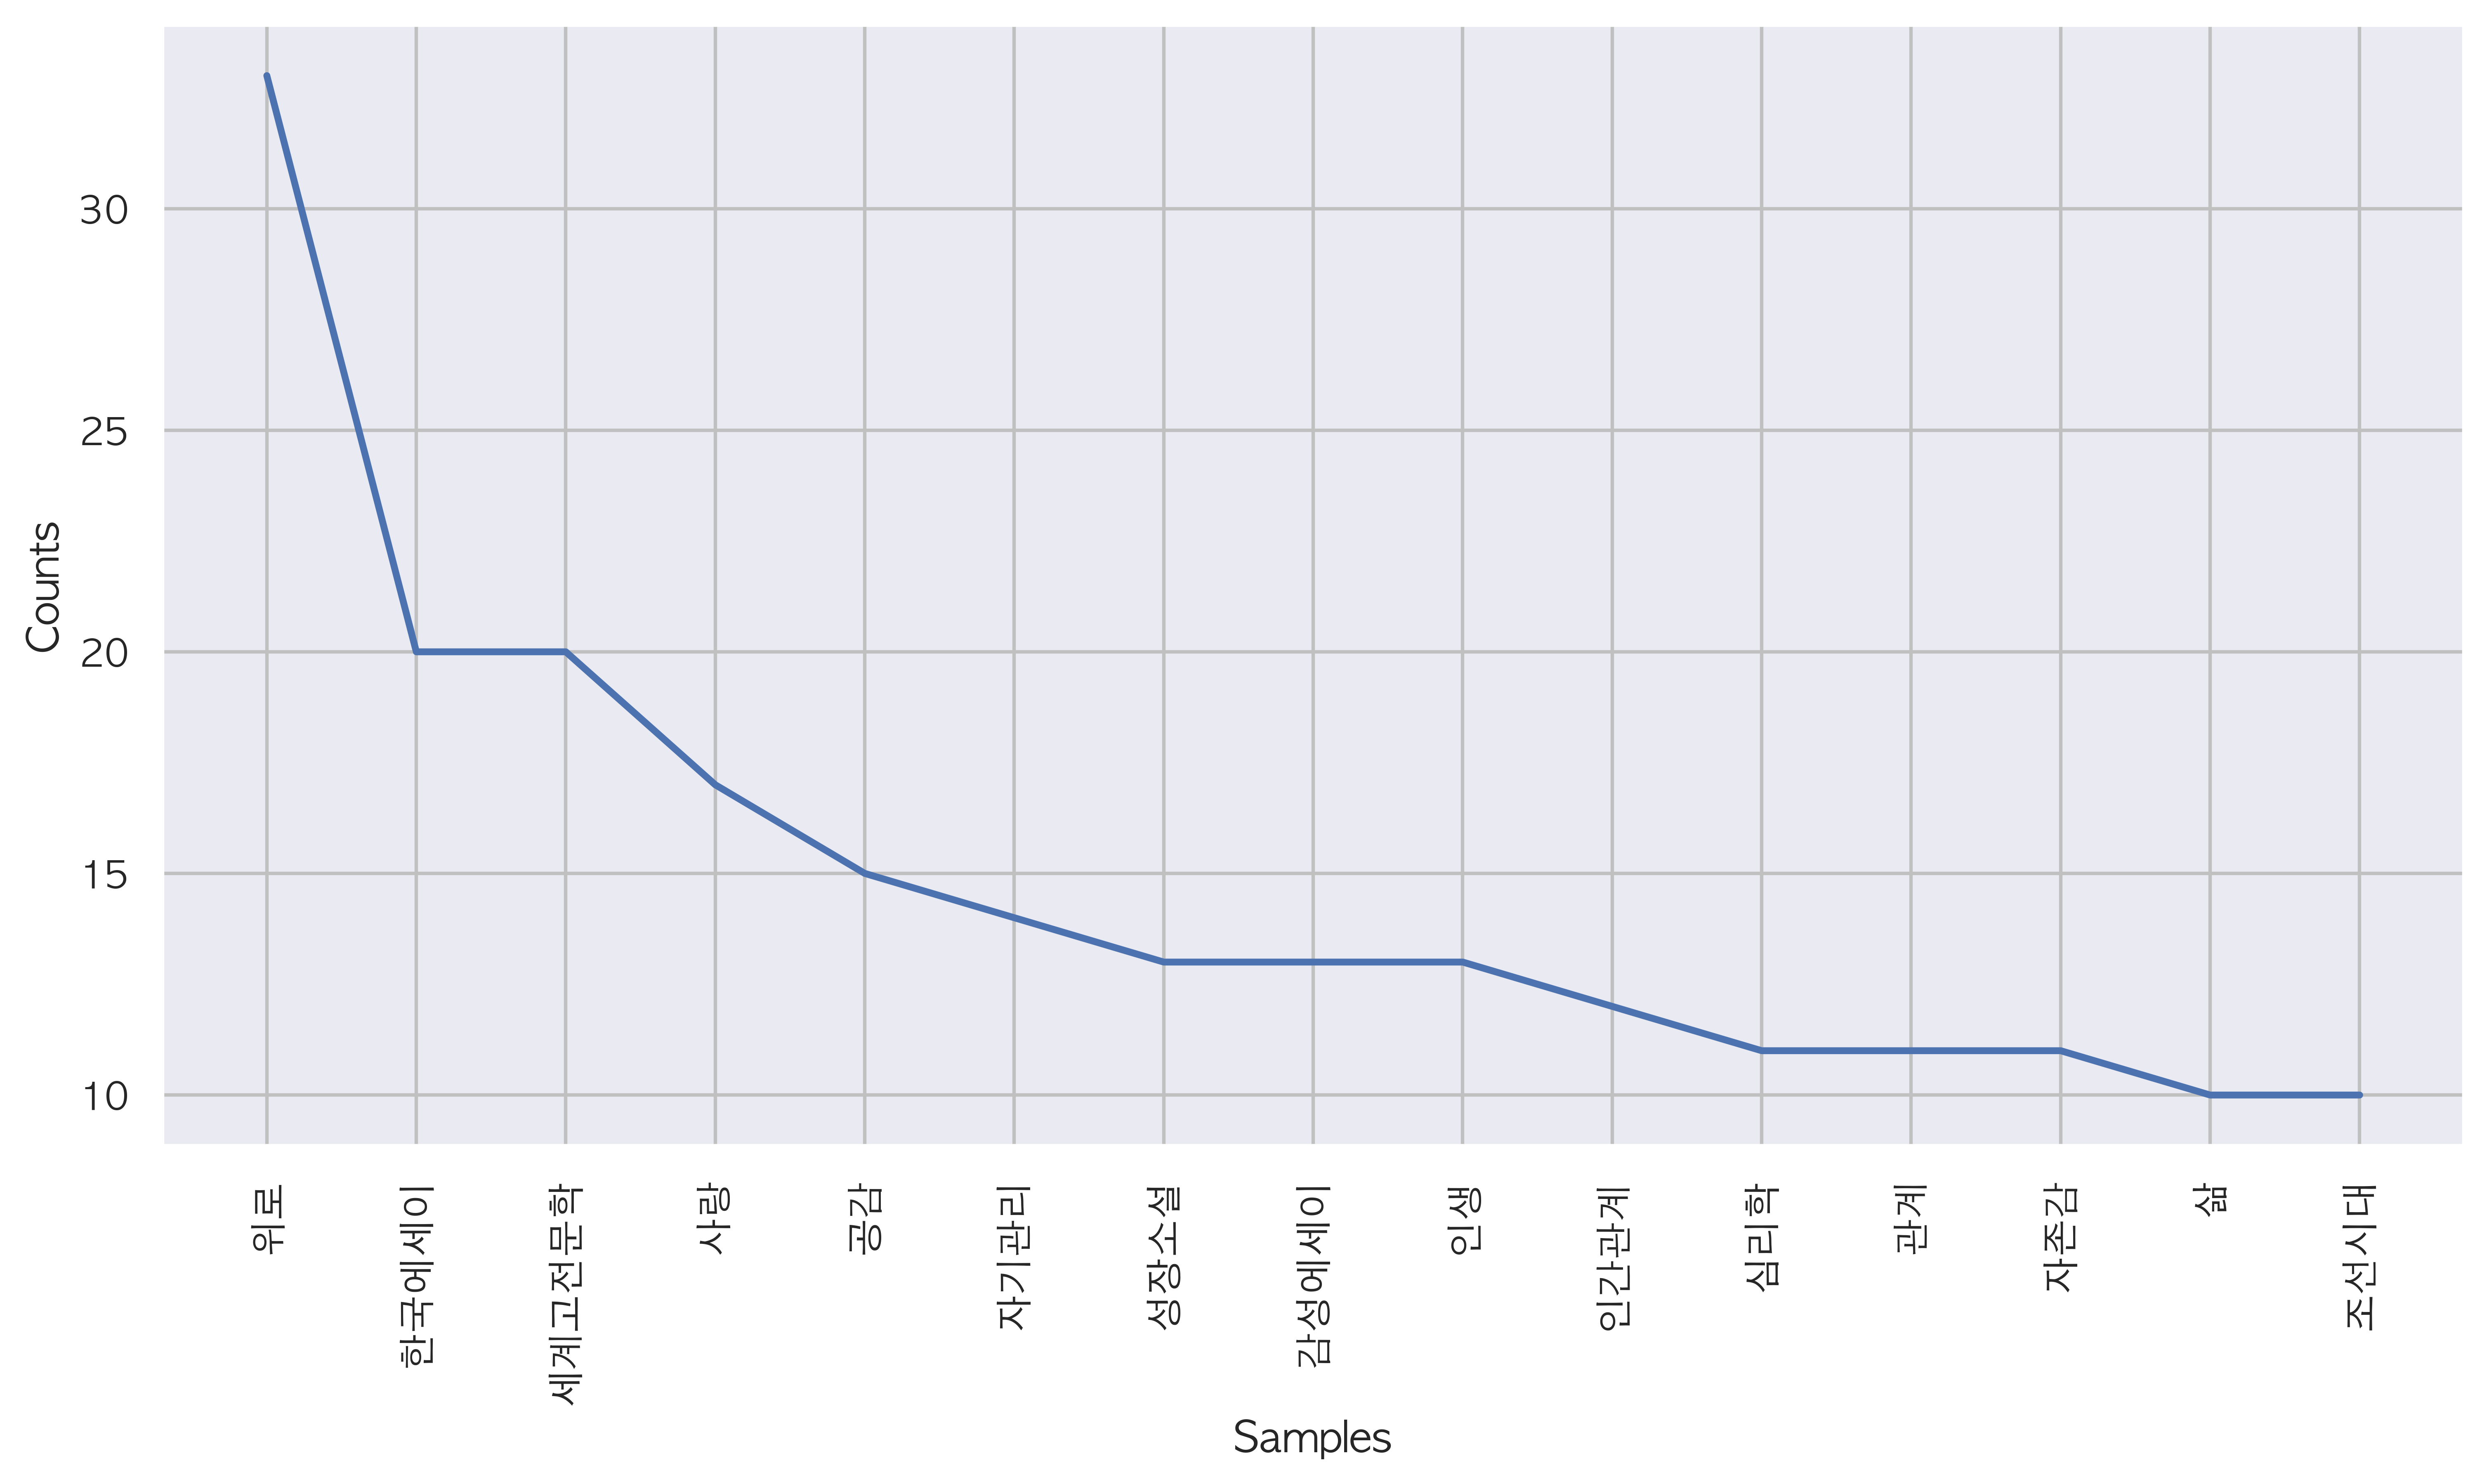

In [43]:
# 단어 빈도 세기
subject_temp3 = nltk.Text(subject_temp, name='키워드')
plt.figure(figsize=(12, 6))
subject_temp3.plot(15)
plt.show()

In [44]:
# 중복제거한 keyword 형변환
keyword_temp2 = list(keyword_temp2)
len(keyword_temp2), keyword_temp2 

(4221,
 ['경제학원론',
  '스마트',
  '성찰',
  '꼬부랑할머니',
  '기업가치',
  '코바늘뜨기',
  '뉴턴',
  '인생관',
  '철학자',
  '린다',
  '경영혁신',
  '불안감',
  '파랑새',
  '독해력',
  '루스벨트',
  '매듭',
  '여행코스',
  '국사',
  '하이닉스',
  '약점극복',
  '눈건강',
  '그래픽노블',
  '반야',
  '배색',
  '공무원시험',
  '마음한구석',
  '키르케고르',
  '소비',
  '엘사',
  '크리에이티브',
  '언어능력',
  '맥킨지',
  '정동진',
  '임철우',
  '빅데이터',
  '교통안전공단',
  '대방광불화엄경',
  '카미노',
  '상황판단',
  '뱃사공',
  '특별혜택',
  '간병',
  '초보자',
  '용기',
  '거시경제학',
  '세계질서',
  '시애틀',
  '내자',
  '전기화학',
  '게리',
  '김소연',
  '활성산소',
  '교열',
  '투자수익',
  '분사구문',
  '조르바',
  '모노',
  '위기',
  '사하라사막',
  '호러게임',
  '작성방법',
  '출애굽',
  '책방',
  '피터슨',
  '인간공학',
  '레퍼런스',
  '우루스',
  'SF소설',
  '영미추리소설',
  '괴물',
  '로마법',
  '첫사랑',
  '한승원',
  '삼부작',
  '플라톤',
  '사라진',
  '무함마드',
  '과학분야',
  '재판',
  '빨강',
  '융합',
  '스택',
  '요한계시록',
  '국제무역',
  '성공담',
  '공기조화',
  '스윙',
  '고난',
  '영국여행',
  '한국청소년소설',
  '조경설계',
  '뉴욕타임즈',
  '서스펜스',
  '무작정',
  '킹덤',
  '메모장',
  '카라',
  '지침서',
  '법어',
  '러일전쟁',
  '자각',
  '환경운동',
  '보건복지부',
  '액세스',
  '스무디',
  '최소

In [45]:
# keyword_temp2 저장
unique_df = pd.DataFrame({'keyword': keyword_temp2})
unique_df

,keyword
0,경제학원론
1,스마트
2,성찰
3,꼬부랑할머니
4,기업가치
...,...
4216,발음기호
4217,삼성전자
4218,채색
4219,페페


In [46]:
unique_df.to_csv('./unique_keyword.csv', mode='w')

In [47]:
# 중복제거한 subject 형변환
subject_temp2 = list(subject_temp2)
len(subject_temp2), subject_temp2

(1351,
 ['성찰',
  '양육',
  'SF단편집',
  '철학자',
  '전체주의',
  '권위',
  '드가',
  '소비',
  '방황',
  '빅데이터',
  '빨간고래',
  '호모비아토르',
  '타이포그래퍼',
  '간병',
  '용기',
  '5.18광주민중항쟁',
  '사회풍자',
  '지리적특성',
  '인문학적사유',
  '유년시절',
  '요리책',
  '책방',
  '스톤헨지',
  '말라파르테문학상',
  'SF소설',
  '영미추리소설',
  '한승원',
  '첫사랑',
  '재판',
  '융합',
  '노력',
  '한국청소년소설',
  '서스펜스',
  '패턴인식',
  '명대사',
  '환경운동',
  '병원균',
  '근이완제',
  '역사인문학',
  '프로그래밍입문',
  '삼국지연의',
  '은하계',
  '시읽기',
  '지정학',
  '미학',
  '시간여행',
  '바른글씨',
  '역사르포르타주',
  '인류학',
  '감염',
  '물리학자',
  '창덕궁',
  'SNS플랫폼',
  '직장인',
  '애플리케이션',
  '임신출산가이드',
  '존재감',
  '풍광',
  '토르',
  '어른아이',
  '이탈리아고전소설',
  '백업',
  '미래학',
  '책읽기',
  '세일즈',
  '기본소득',
  '감동실화',
  '고독',
  'React.js',
  '일본에세이',
  '라이프스타일',
  '연애소설',
  '드라마',
  '라인업',
  '사회적돌봄',
  '단편소설',
  '계절',
  '정치론',
  '미국여행',
  '기후학',
  '함수형컴포넌트',
  '인지장애',
  '노동시장정책',
  '한국사',
  '정신',
  '프로그래머',
  '살인자',
  '현대판삼국지',
  '자이언트펭수',
  '중국고전',
  '서울대추천도서',
  '조직관리',
  '퇴직연금',
  '순조',
  '문학동네청소년문학상',
  '다큐멘터리',
  '근현대사',
  '그래픽',
  '강의록',

In [48]:
unique_df2 = pd.DataFrame({'subject': subject_temp2})
unique_df2.to_csv('./unique_subject.csv')

In [49]:
# 주제와 키워드 합침
com = keyword_temp + subject_temp
com

['시인',
 '수필',
 '오월',
 '박준',
 '박완서',
 '수필집',
 '스토리텔링',
 '광개토대왕',
 '기출문제',
 '파이널',
 '압축',
 '막판',
 '페미니즘',
 '여성학',
 '시선',
 '페미니스트',
 '문화정치',
 '역사학자',
 '인간본성',
 '어머니',
 '작가',
 '한국소설',
 '본성',
 '유진',
 '가족',
 '여성',
 '청소년소설',
 '한국소설',
 '장편소설',
 '여성서사',
 '성장소설',
 '데미안',
 '사문',
 '바라문',
 '뱃사공',
 '타마',
 '미국소설',
 '노벨문학상',
 '퓰리처상',
 '실존철학',
 '마지막소설',
 '미국현대문학',
 '연애',
 '일상',
 '심리학',
 '한국에세이',
 '위로',
 '마음챙김',
 '차라투스트라',
 '철학에세이',
 '우파니샤드',
 '계단',
 '인문과학',
 '불편',
 '여행에세이',
 '바르셀로나',
 '빈티지',
 '포틀랜드',
 '뉴질랜드',
 '베를린',
 '추천코스',
 '여행코스',
 '자전거여행',
 '순환',
 '삼양',
 '동해',
 '여행가이드북',
 '유럽여행',
 '체코',
 '베스트',
 '프라하',
 '크로아티아',
 '여행가이드북',
 '타이베이',
 '타이',
 '대만여행',
 '동부',
 '숙소예약',
 '웹툰',
 '케냐',
 '에티오피아',
 '갱스터',
 '마다가스카르',
 '우간다',
 '책읽기',
 '만화책',
 '스리랑카',
 '영어교육',
 '언어교육',
 '교육방법',
 '시나리오',
 '감독',
 '야구',
 '히어로즈',
 '이글스',
 '이슈',
 '심리치료',
 '응급처치',
 '생존',
 '락스',
 '아쿠아',
 '서바이벌',
 '스티커북',
 '그레이',
 '하운드',
 '아이슬란드',
 '치와와',
 '진돗개',
 '행복',
 '자기관리',
 '자기혁신',
 '대인관계',
 '긍정',
 '우울',
 '유튜브',
 '시간관리',
 '전술',
 '스마트폰',
 '하이라이트',

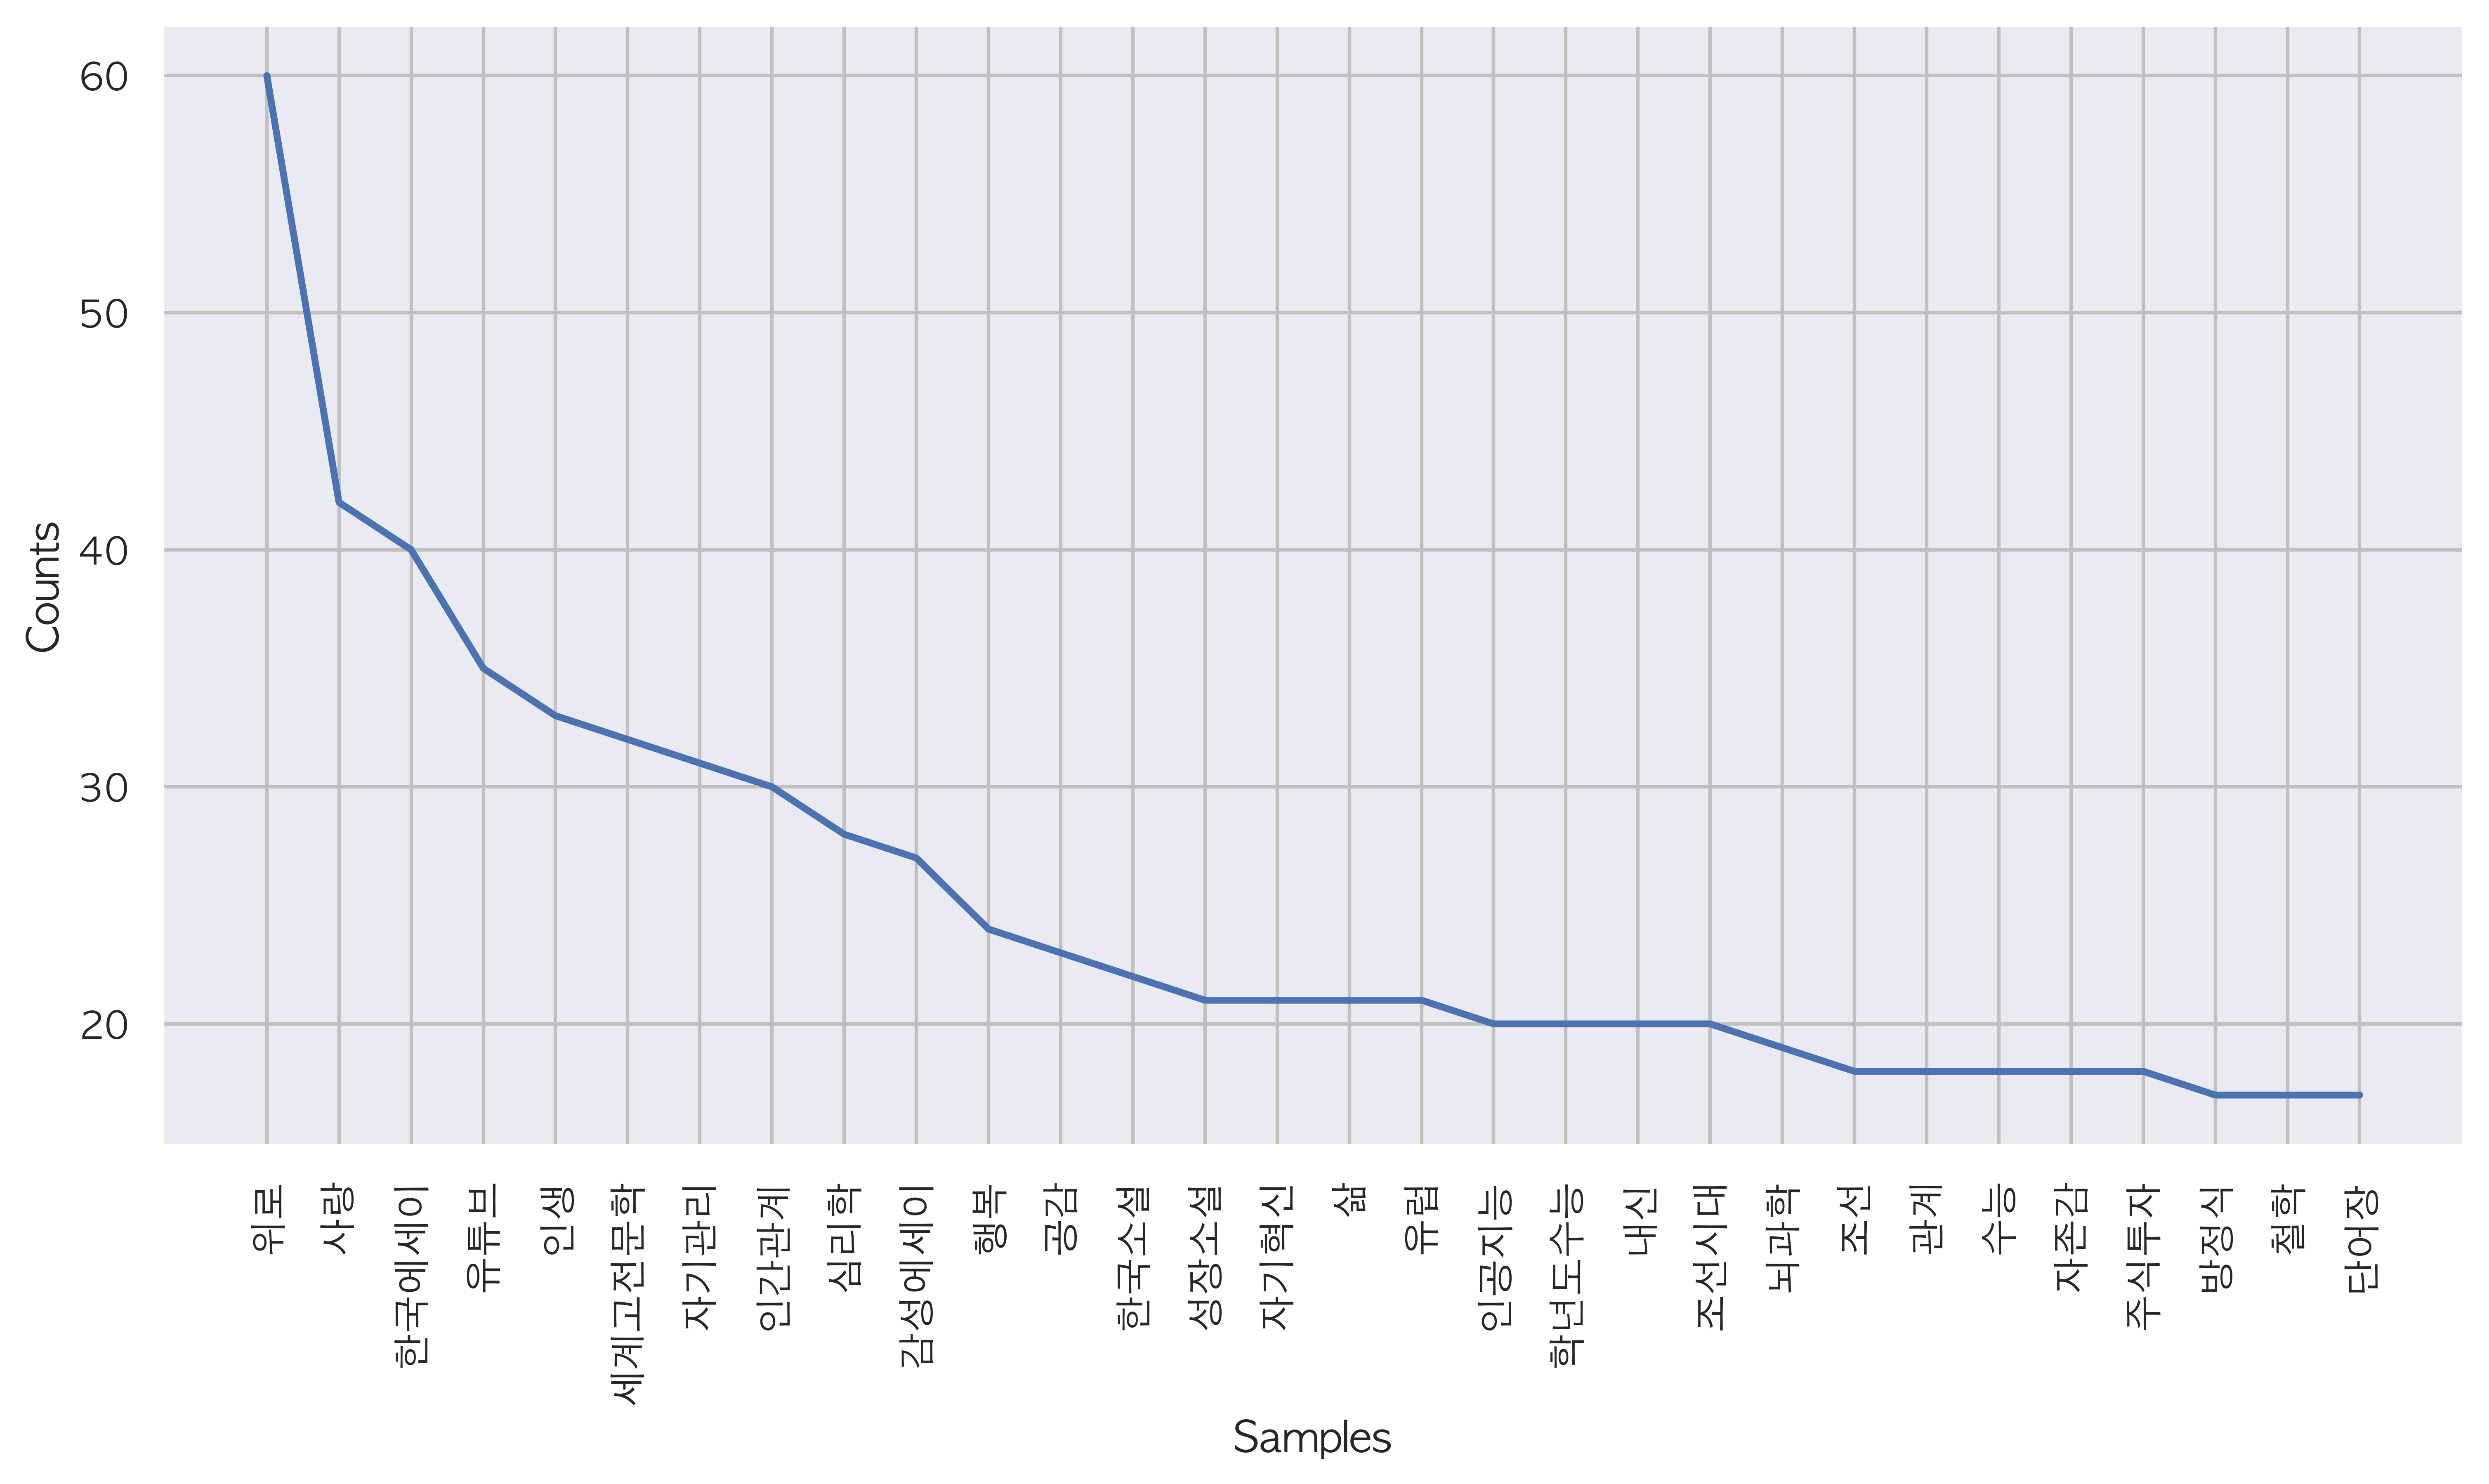

In [50]:
# 단어 빈도 세기
combination = nltk.Text(com, name='키워드')
plt.figure(figsize=(12, 6))
combination.plot(30)
plt.show()

In [72]:
for num in range(0, 1507):
    if '여성' in book_df['keyword'][num] or '도시' in book_df['subject'][num]:
        print(book_df['keyword'][num], book_df['ISBN'][num])

['가족', '여성', '청소년소설', '한국소설', '장편소설', '여성서사'] 9788936477936
['여성', '한국소설', '신예작가', '작품', '아내', '가부장제'] 9788954671156
['한국현대소설', '한국소설', '여성서사', '여성', '살인사건', '조각'] 9791162203620
['여성', '청소년소설', '한국소설', '사진', '여성서사', '버들'] 9788936456955
['건축', '공간', '건축이야기', '건축공간', '멀티플렉스', '현대건축'] 9788932473802
['펭귄', '위로', '일기', '공감', '여성', '대화'] 9788954658355
['여성', '여자', '메소드', '네트워킹', '인성', '레퍼런스'] 9791160402971
['장애', '부모', '여성', '취약계층', '국가', '사회곳곳'] 9788925569376
